In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [2]:
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'



In [3]:
seg_categories = os.listdir(train_dir)
seg_categories_test = os.listdir(test_dir)

print(seg_categories)
print(seg_categories_test)

['pituitary', 'notumor', 'meningioma', 'glioma']
['pituitary', 'notumor', 'meningioma', 'glioma']


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

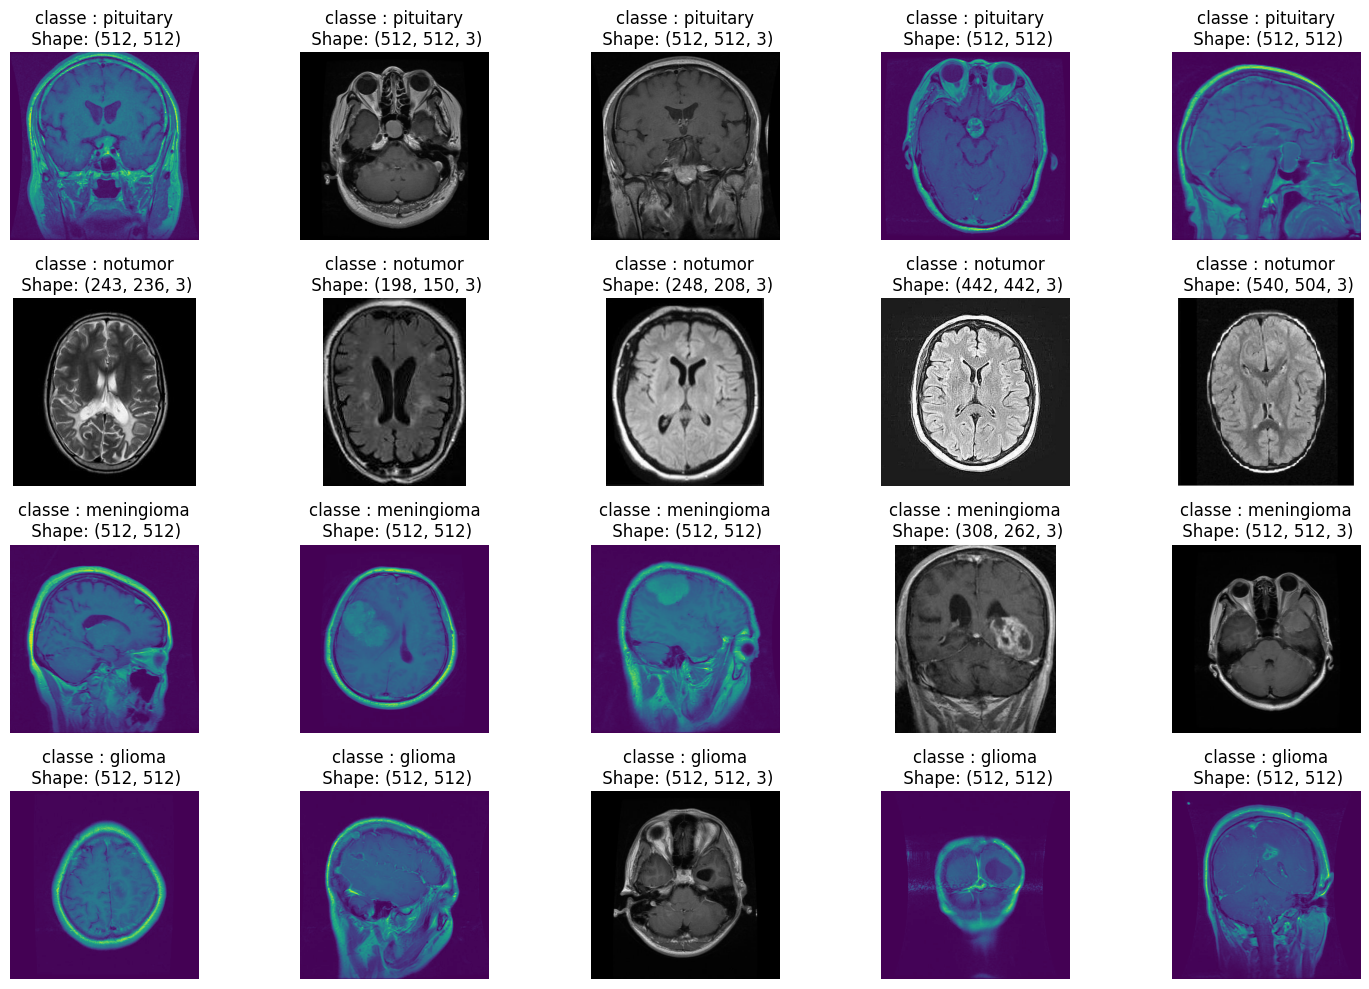

In [5]:


import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(len(seg_categories), 5, figsize=(15, 10))
for i, category in enumerate(seg_categories):
    category_path = os.path.join(train_dir, category)
    category_path_test = os.path.join(test_dir, category)
    
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        selected_images = random.sample(images, 5)  
        images_test = os.listdir(category_path_test)
        selected_images_test = random.sample(images_test, 5)  
        
        for j, image_name in enumerate(selected_images):
            image_path = os.path.join(category_path, image_name) #flowers/daisy/12652.jpg
            img = mpimg.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off') 
            axes[i, j].set_title(f"classe : {category}\n Shape: {img.shape}")  

        axes[i, 0].set_ylabel(f"Category: {category}", rotation=0, size='large', labelpad=45)

plt.tight_layout()
plt.show()

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical'
)

Validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4571 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')  
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,225,796 (225.93 MB)

 Trainable params: 59,225,796 (225.93 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=Validation_generator,
    validation_steps=Validation_generator.samples // Validation_generator.batch_size

)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731238216.163096     122 service.cc:145] XLA service 0x7c356c007020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731238216.163163     122 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731238216.163168     122 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1731238234.033301     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


142/142 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.3931 - loss: 1.2657 - val_accuracy: 0.5357 - val_loss: 1.1929
Epoch 2/20
  1/142 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.7500 - loss: 0.6284

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7500 - loss: 0.6284 - val_accuracy: 0.7143 - val_loss: 0.9449
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.6235 - loss: 0.8433 - val_accuracy: 0.6393 - val_loss: 0.9314
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7188 - loss: 0.6987 - val_accuracy: 0.6667 - val_loss: 1.0748
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.7188 - loss: 0.6670 - val_accuracy: 0.6893 - val_loss: 0.8487
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5938 - loss: 0.7258 - val_accuracy: 0.7619 - val_loss: 0.6449
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.7505 - loss: 0.6092 - val_accuracy: 0.6866 - val_loss: 0.8713
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5312 - loss: 0.9134 - val_accuracy: 0.5714 - val_loss: 1.1990
Epoch 9/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.7561 - loss: 0.6026 - val_accuracy: 0.7321 -

In [11]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 543ms/step - accuracy: 0.7766 - loss: 0.7244
Test accuracy: 77.12%


# Transfer Learning

In [12]:
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

In [13]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(512, 512, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
for layer in base_model.layers:
    layer.trainable =False

In [15]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 512, 512, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 512, 512, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 256, 256, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 256, 256, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 128, 128, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 64, 64, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras import Model

sortie_vgg = base_model.output

global_avg_pool = GlobalAveragePooling2D() (sortie_vgg)
dense_1 =  Dense(512, activation='relu', name='notre_couche_dense_1')  (global_avg_pool)
dropout_1 = Dropout(0.2) (dense_1)
dense_2 =  Dense(256, activation='relu', name='notre_couche_dense_2')  (dropout_1)
dropout_2 = Dropout(0.2) (dense_2)
sortie_notre_modele = Dense(4, activation='softmax', name='notre_sortie') (dropout_2)
transfer_model = Model(inputs = base_model.input, outputs = sortie_notre_modele)


In [17]:
transfer_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 512, 512, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 512, 512, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 256, 256, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 256, 256, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 128, 128, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 64, 64, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 64, 64, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ notre_couche_dense_1 (Dense)    │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ notre_couche_dense_2 (Dense)    │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,109,700 (57.64 MB)

 Trainable params: 395,012 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
transfer_model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=20,
    validation_data=Validation_generator,
    validation_steps=20

)

Epoch 1/20


2024-11-10 12:23:57.313006: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=2,k3=0} for conv (f32[32,64,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,512,512]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-10 12:23:57.481072: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.168170298s
Trying algorithm eng11{k2=2,k3=0} for conv (f32[32,64,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,512,512]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operat

200/200 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.4965 - loss: 1.1097 - val_accuracy: 0.6875 - val_loss: 0.8324
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.7174 - loss: 0.6802 - val_accuracy: 0.7206 - val_loss: 0.7723
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.7789 - loss: 0.5499 - val_accuracy: 0.7203 - val_loss: 0.7227
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.8210 - loss: 0.4606 - val_accuracy: 0.7505 - val_loss: 0.6564
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.8283 - loss: 0.4387 - val_accuracy: 0.7563 - val_loss: 0.6497
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.8579 - loss: 0.3934 - val_accuracy: 0.7685 - val_loss: 0.5895
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.8501 - loss: 0.3992 - val_accuracy: 0.7469 - val_loss: 0.7031
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.8603 - loss: 0.3734 - val_accuracy: 0.792

In [20]:
loss, accuracy = transfer_model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.8366 - loss: 0.4863

2024-11-10 14:01:36.685042: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=2,k3=0} for conv (f32[31,64,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,64,512,512]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-10 14:01:36.819937: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.13499881s
Trying algorithm eng11{k2=2,k3=0} for conv (f32[31,64,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,64,512,512]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operati

41/41 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8358 - loss: 0.4879 
Test accuracy: 81.85%


# Fine Tuning

In [21]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(512, 512, 3)
)

In [22]:
for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [28]:
sortie_vgg = base_model.output

global_avg_pool = GlobalAveragePooling2D() (sortie_vgg)

dense_1 =  Dense(512, activation='relu', name='notre_couche_dense_1')  (global_avg_pool)

dropout_1 = Dropout(0.2) (dense_1)

dense_2 =  Dense(256, activation='relu', name='notre_couche_dense_2')  (dropout_1)

dropout_2 = Dropout(0.2) (dense_2)

sortie_notre_modele = Dense(4, activation='softmax', name='notre_sortie') (dropout_2)


fine_tuned_model = Model(inputs = base_model.input, outputs = sortie_notre_modele)


In [29]:
for layer in base_model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [30]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate = 1e-5)

In [31]:
fine_tuned_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
fine_tuned_model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=30,
    validation_data=Validation_generator,
    validation_steps=20

)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.9066 - loss: 0.2731 - val_accuracy: 0.8422 - val_loss: 0.4724
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.9075 - loss: 0.2652 - val_accuracy: 0.8244 - val_loss: 0.4696
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.9024 - loss: 0.2798 - val_accuracy: 0.8000 - val_loss: 0.4802
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.9082 - loss: 0.2557 - val_accuracy: 0.8263 - val_loss: 0.4168
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.9136 - loss: 0.2473 - val_accuracy: 0.8516 - val_loss: 0.4274
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9207 - loss: 0.2323 - val_accuracy: 0.8204 - val_loss: 0.4768
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.9177 - loss: 0.2301 - val_accuracy: 0.8203 - val_loss: 0.4739
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9172 - loss: 0.2263 - val_accu

In [35]:
loss, accuracy = fine_tuned_model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 613ms/step - accuracy: 0.8931 - loss: 0.3333
Test accuracy: 89.47%


In [37]:
import numpy as np

In [39]:
batch_size = 32

In [42]:
classes = ['pituitary', 'notumor', 'meningioma', 'glioma'] 

{'pituitary': 99.989, 'notumor': 0.002, 'meningioma': 0.001, 'glioma': 0.008}
{'pituitary': 0.036, 'notumor': 0.007, 'meningioma': 0.001, 'glioma': 99.956}
{'pituitary': 0.01, 'notumor': 0.043, 'meningioma': 99.945, 'glioma': 0.002}
{'pituitary': 1.921, 'notumor': 30.116, 'meningioma': 0.22, 'glioma': 67.743}
{'pituitary': 0.345, 'notumor': 99.586, 'meningioma': 0.007, 'glioma': 0.063}
{'pituitary': 99.239, 'notumor': 0.699, 'meningioma': 0.046, 'glioma': 0.016}
{'pituitary': 0.345, 'notumor': 99.586, 'meningioma': 0.007, 'glioma': 0.063}
{'pituitary': 16.88, 'notumor': 28.5, 'meningioma': 0.055, 'glioma': 54.565}
{'pituitary': 99.985, 'notumor': 0.01, 'meningioma': 0.003, 'glioma': 0.001}
{'pituitary': 0.0, 'notumor': 0.014, 'meningioma': 99.986, 'glioma': 0.0}


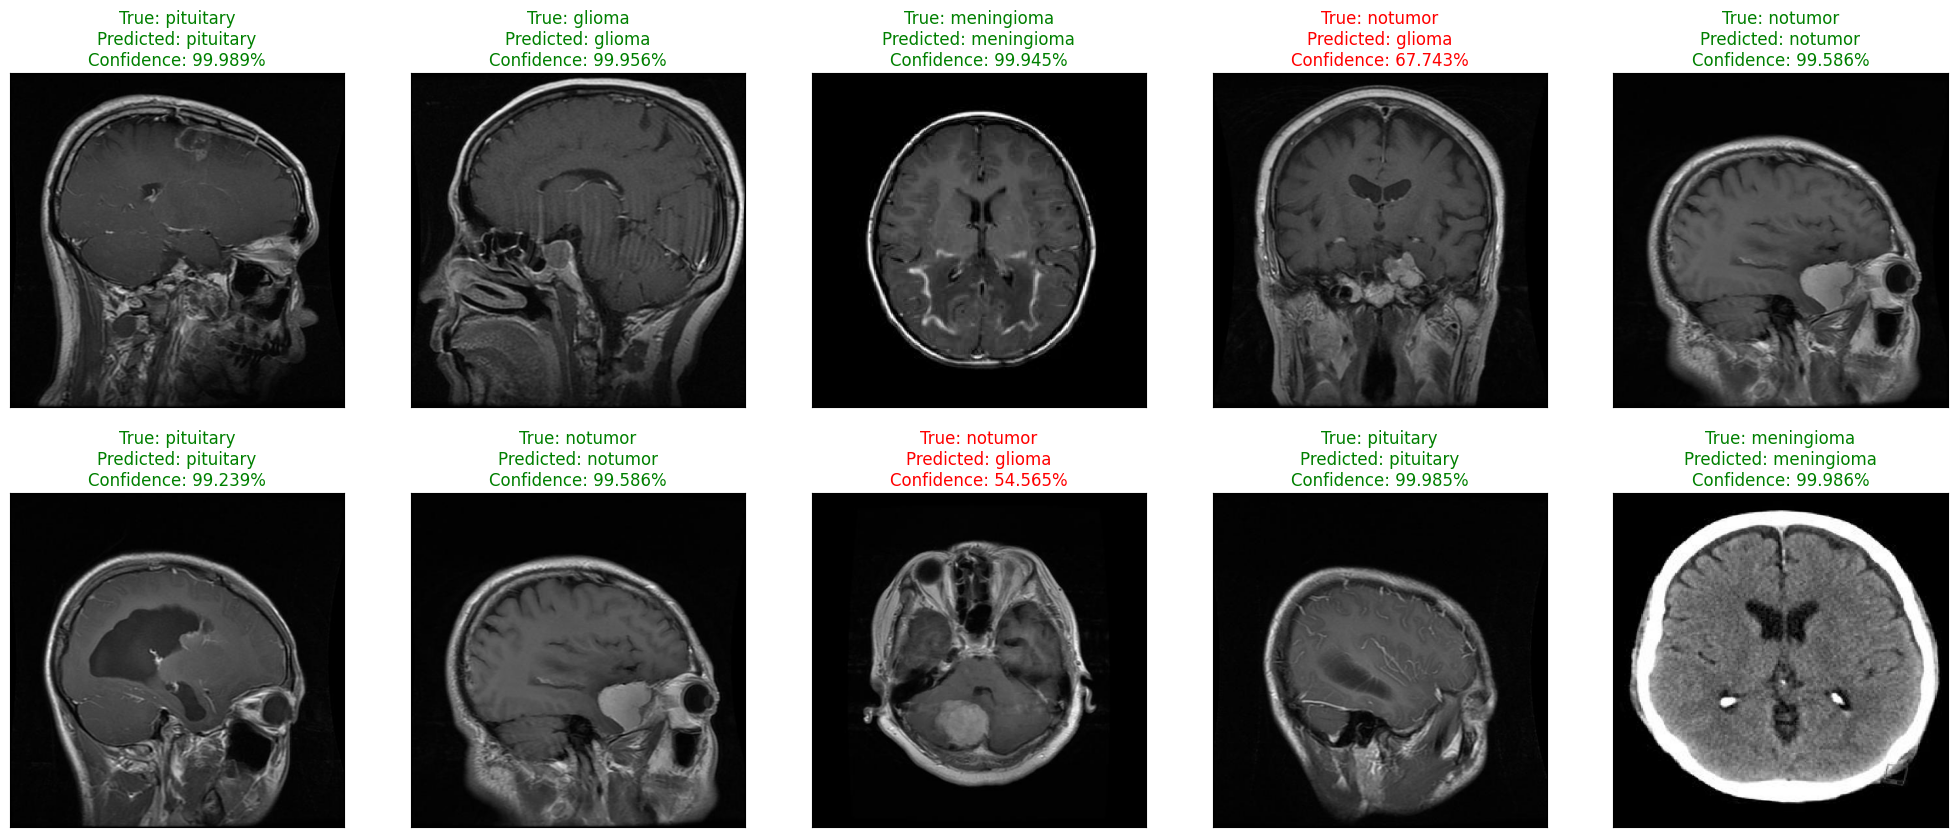

<Figure size 640x480 with 0 Axes>

In [46]:
# Display 10 random pictures predictions from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator))

Random_Img_Index = np.random.randint(0, batch_size , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Predictions = fine_tuned_model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0)

    Model_Highest_Prediction = np.argmax(Model_Predictions)

    Model_Predictions_Map = { c: round(p*100,3) for (c,p) in zip (classes, Model_Predictions.tolist()[0] ) }

    ax.imshow(Random_Img)

    Pred_Class = classes[Model_Highest_Prediction]

    if classes[Random_Img_Label] == Pred_Class:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {classes[Random_Img_Label]}\nPredicted: {Pred_Class}\nConfidence: {Model_Predictions_Map[Pred_Class]}%",
          color=color)
    print(Model_Predictions_Map)
plt.show()
plt.tight_layout()